In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
dataset = (r'/Volumes/UnionSine/data_transfer/ssp126/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [4]:
dataset_oae = (r'/Volumes/UnionSine/data_transfer/ssp126/CO2flux_CDR_EU_coast_ssp126_1m.nc')
data_oae = xr.open_dataset(dataset_oae)

In [5]:
sliced_data_baseline = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [6]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_data_baseline_plot = sliced_data_baseline.co2flux_cpl.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [8]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

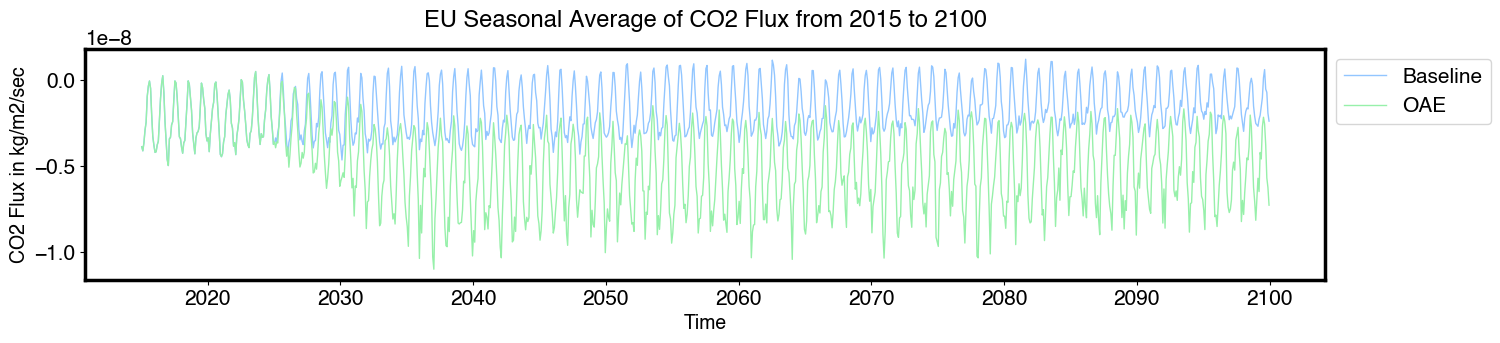

In [9]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of CO2 Flux from 2015 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [10]:
sliced_frame_baseline_plot = sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

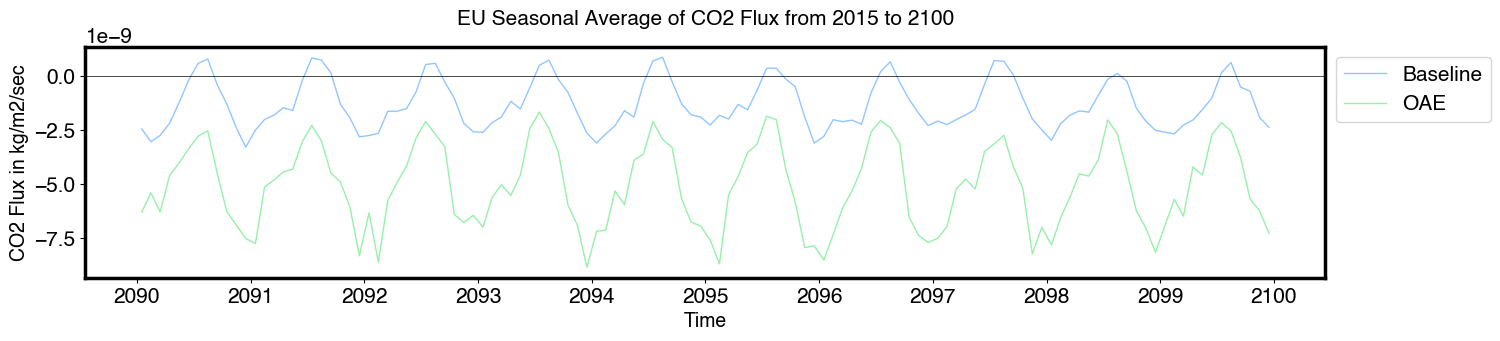

In [12]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of CO2 Flux from 2015 to 2100', fontsize=15, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [13]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_baseline = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [14]:
co2flux_season_summary_baseline = co2_flux_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_baseline = co2_flux_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean_baseline = co2flux_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [15]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_oae = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [16]:
co2flux_season_summary_oae = co2_flux_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_oae = co2_flux_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean_oae = co2flux_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


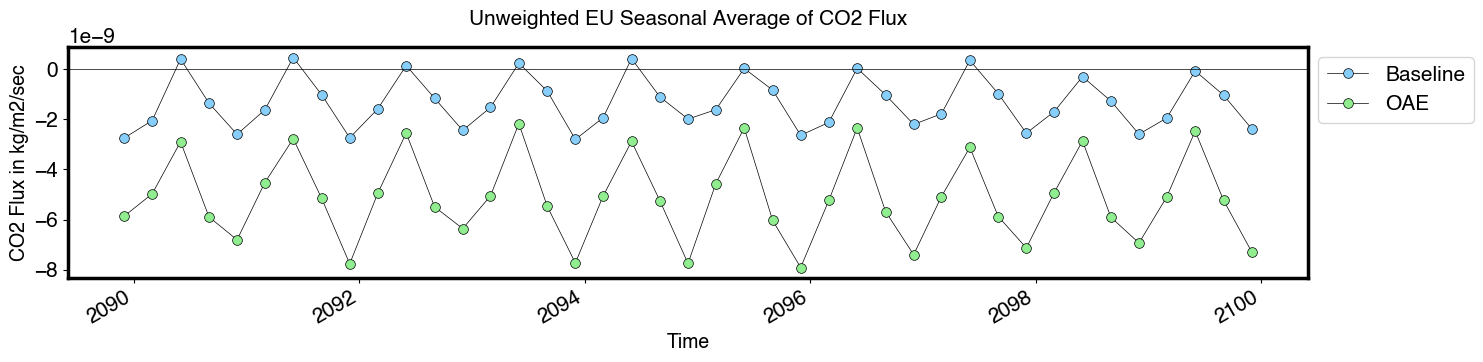

In [17]:
f, ax = plt.subplots(figsize=(16, 3))

co2flux_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of CO2 Flux", fontsize= 15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [18]:
month_length_baseline = co2_flux_baseline.time_counter.dt.days_in_month
co2flux_weighted_mean_baseline = ((co2_flux_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_baseline = co2flux_weighted_mean_baseline.where(co2flux_weighted_mean_baseline)
co2flux_weighted_season_baseline = co2flux_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [19]:
month_length_oae = co2_flux_oae.time_counter.dt.days_in_month
co2flux_weighted_mean_oae = ((co2_flux_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_oae = co2flux_weighted_mean_oae.where(co2flux_weighted_mean_oae)
co2flux_weighted_season_oae = co2flux_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

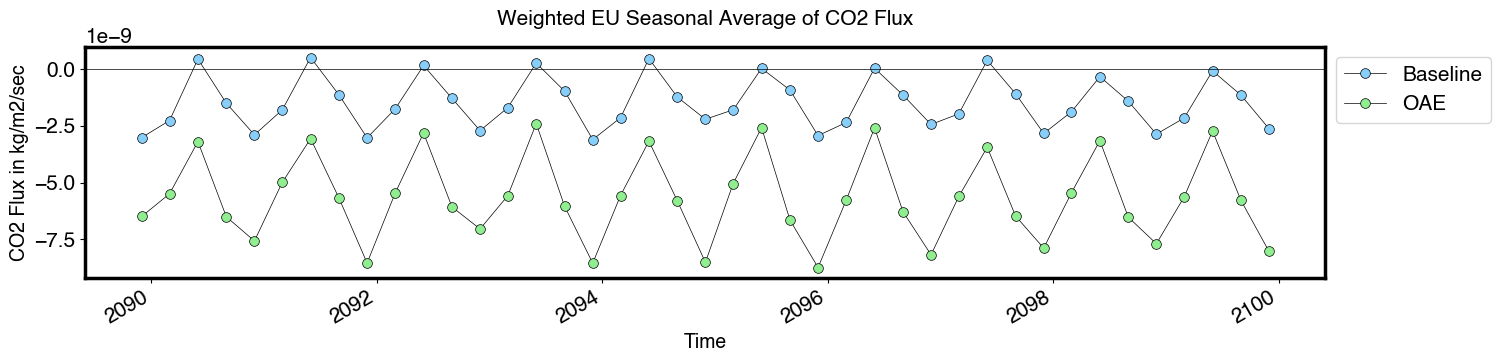

In [20]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(16, 3))
co2flux_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

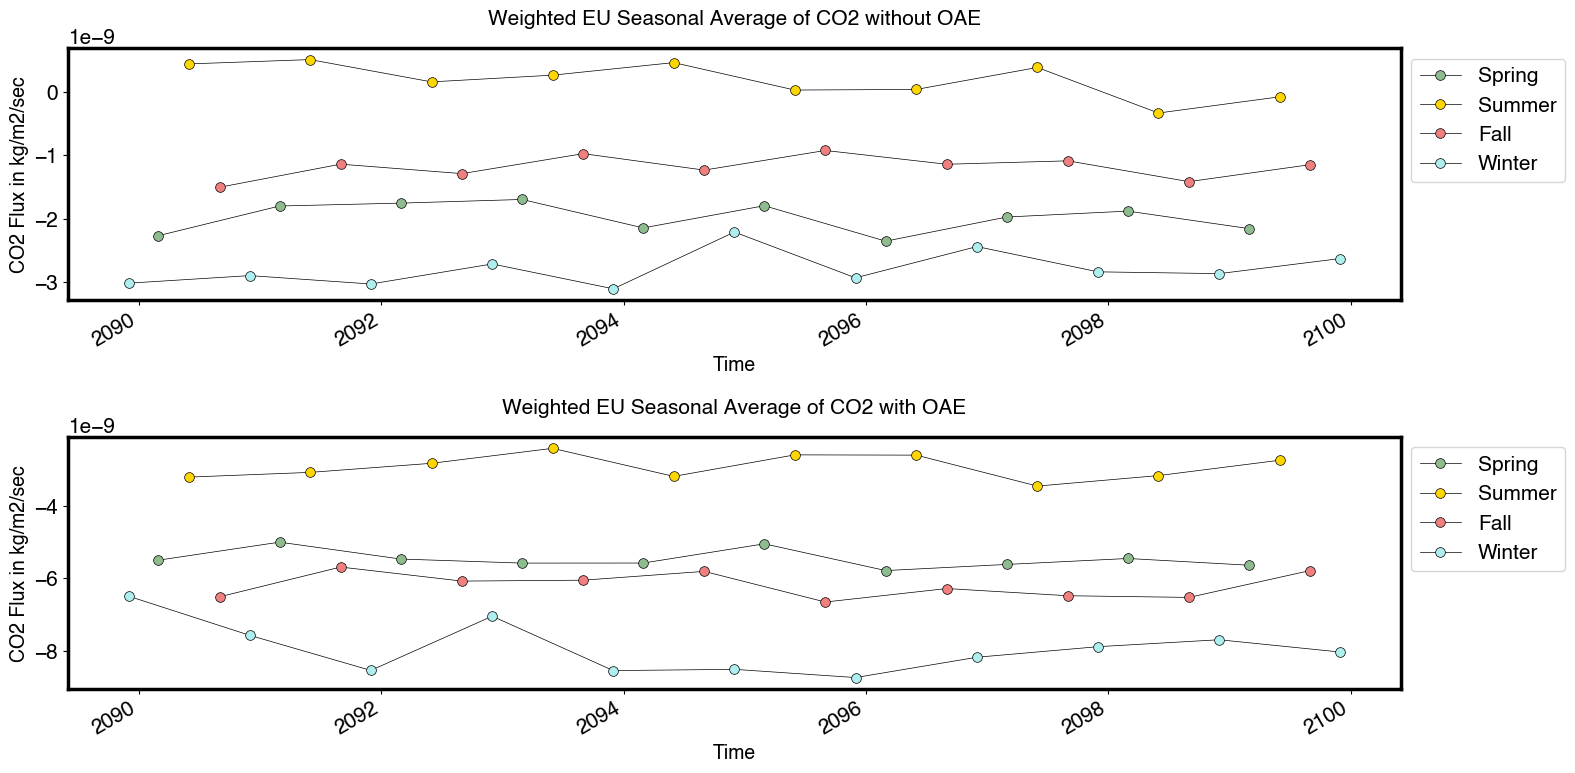

In [21]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in co2flux_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)

for month, arr in co2flux_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
f.tight_layout()
plt.show()

In [22]:
co2flux_weighted_baseline = co2flux_weighted_season_baseline.to_dataframe('CO2_Flux')
co2flux_weighted_baseline['Month'] = pd.DatetimeIndex(co2flux_weighted_baseline.index).month

In [23]:
conditions = [
    (co2flux_weighted_baseline['Month'] == 3),
    (co2flux_weighted_baseline['Month'] == 6),
    (co2flux_weighted_baseline['Month'] == 9),
    (co2flux_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_baseline['Month'] = np.select(conditions, values)

In [24]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

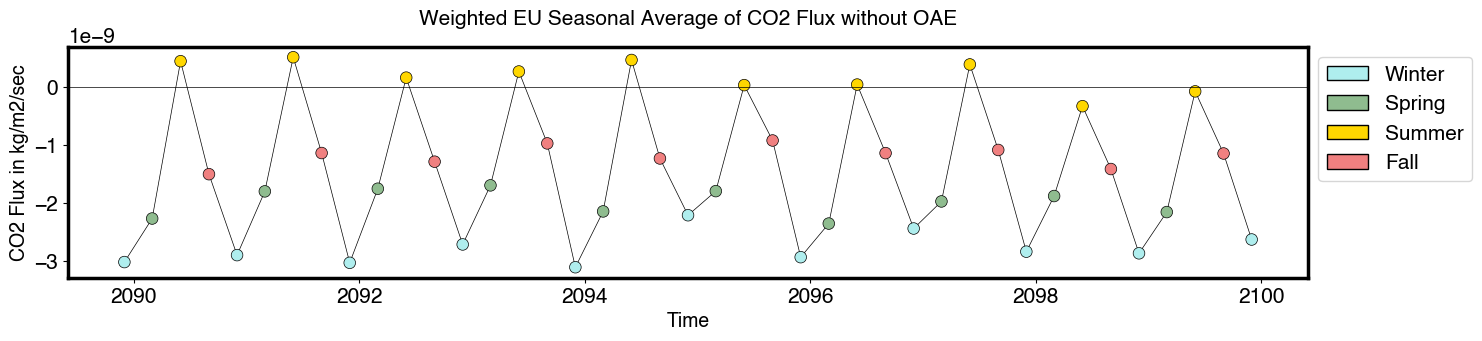

In [25]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux without OAE", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

In [26]:
co2flux_weighted_baseline

,CO2_Flux,Month
time_counter,,
2089-12-01,-3.016761e-09,Winter
2090-03-01,-2.267481e-09,Spring
2090-06-01,4.399270e-10,Summer
2090-09-01,-1.504634e-09,Fall
2090-12-01,-2.897271e-09,Winter
2091-03-01,-1.800228e-09,Spring
2091-06-01,5.079114e-10,Summer
2091-09-01,-1.140562e-09,Fall
2091-12-01,-3.029564e-09,Winter


In [27]:
co2flux_weighted_oae = co2flux_weighted_season_oae.to_dataframe('CO2_Flux')
co2flux_weighted_oae['Month'] = pd.DatetimeIndex(co2flux_weighted_oae.index).month

In [28]:
conditions = [
    (co2flux_weighted_oae['Month'] == 3),
    (co2flux_weighted_oae['Month'] == 6),
    (co2flux_weighted_oae['Month'] == 9),
    (co2flux_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_oae['Month'] = np.select(conditions, values)

In [29]:
colors = dict(zip(co2flux_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of CO2 Flux with OAE')

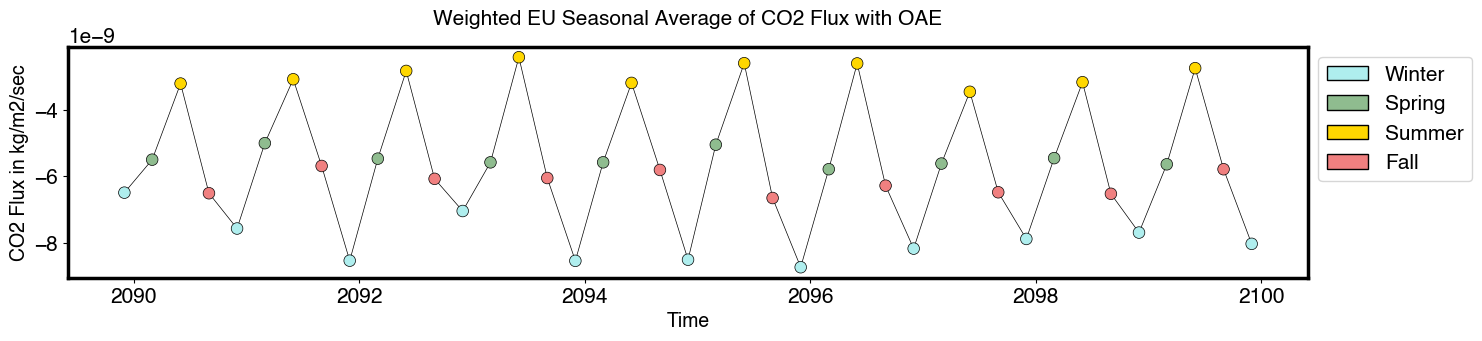

In [30]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux with OAE", fontsize=15, y=1.06)

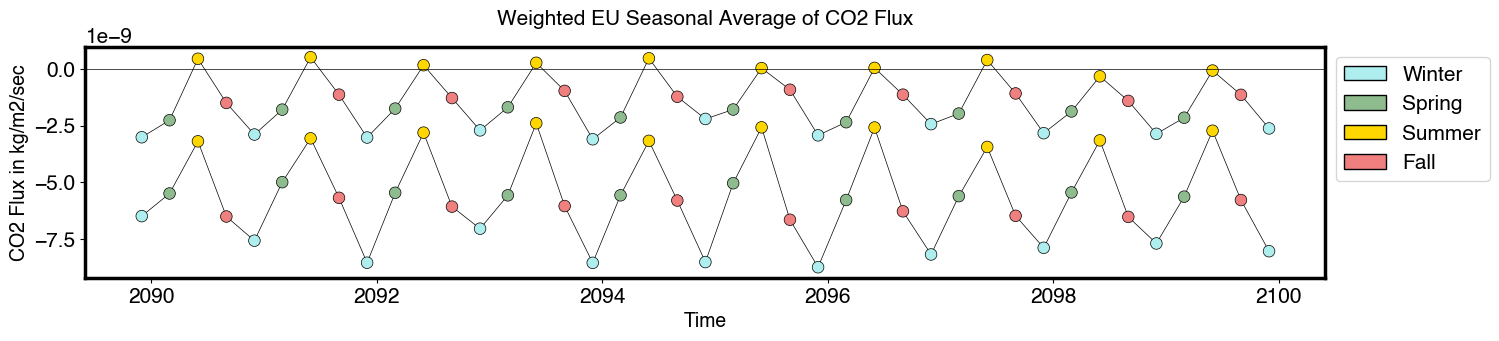

In [31]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

In [32]:
mean_baseline = (sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).co2flux_cpl.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [33]:
mean_oae = (sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).co2flux_cpl.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

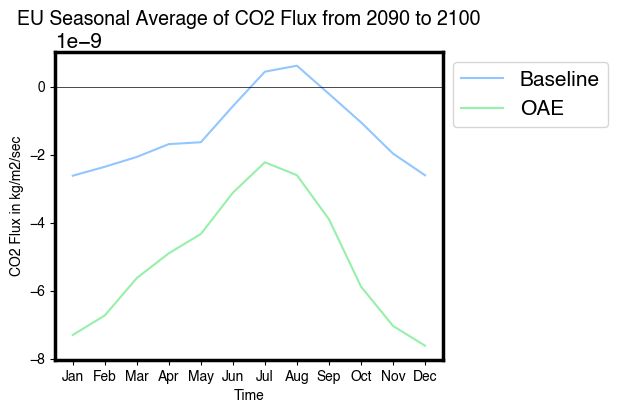

In [34]:
plt.figure(figsize=(5,4))
plt.plot(mean_baseline.co2flux_cpl, label='Baseline')
plt.plot(mean_oae.co2flux_cpl, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel("Time", fontsize=10)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of CO2 Flux from 2090 to 2100', fontname="Helvetica", fontsize=14, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [35]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [36]:
weights_baseline = weights_baseline.to_dataset()

In [37]:
ds_weighted_baseline = (sliced_frame_baseline.co2flux_cpl * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='co2flux_cpl')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

Text(0.5, 1.03, 'EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 without OAE')

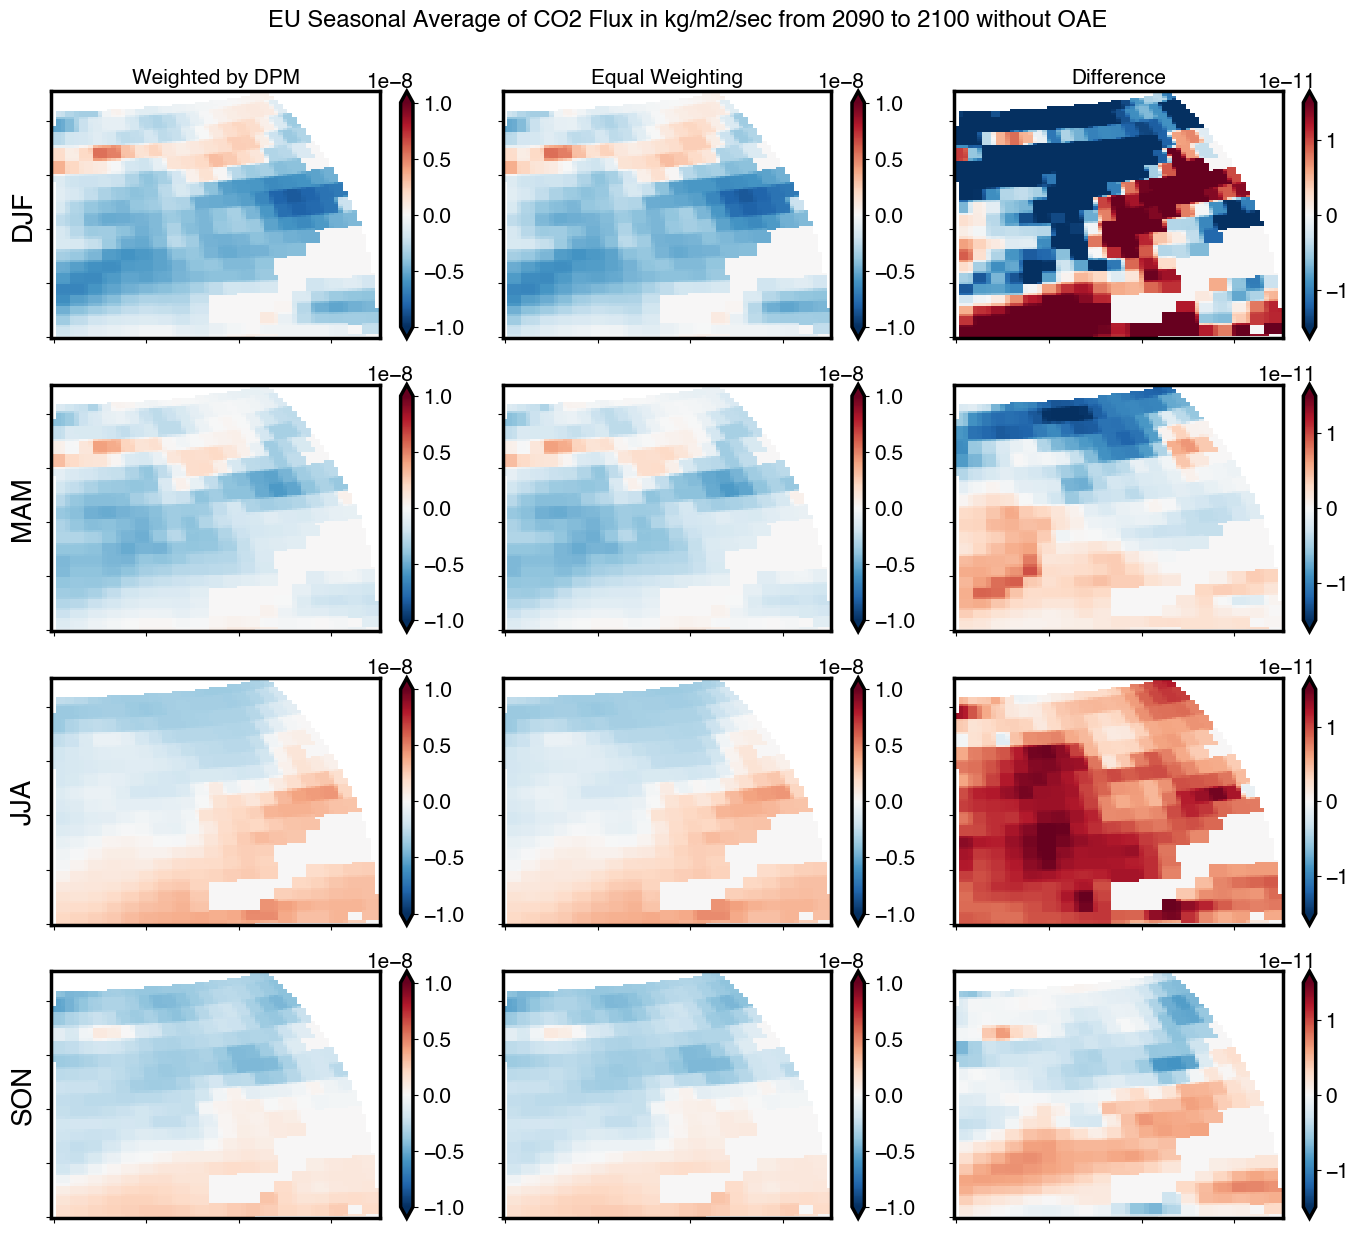

In [38]:
notnull = pd.notnull(ds_unweighted_baseline["co2flux_cpl"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.000000000015,
        vmax=0.000000000015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 without OAE", fontsize=17, y=1.03)

In [39]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [40]:
weights_oae = weights_oae.to_dataset()

In [41]:
ds_weighted_oae = (sliced_frame_oae.co2flux_cpl * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='co2flux_cpl')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

Text(0.5, 1.03, 'EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 without OAE')

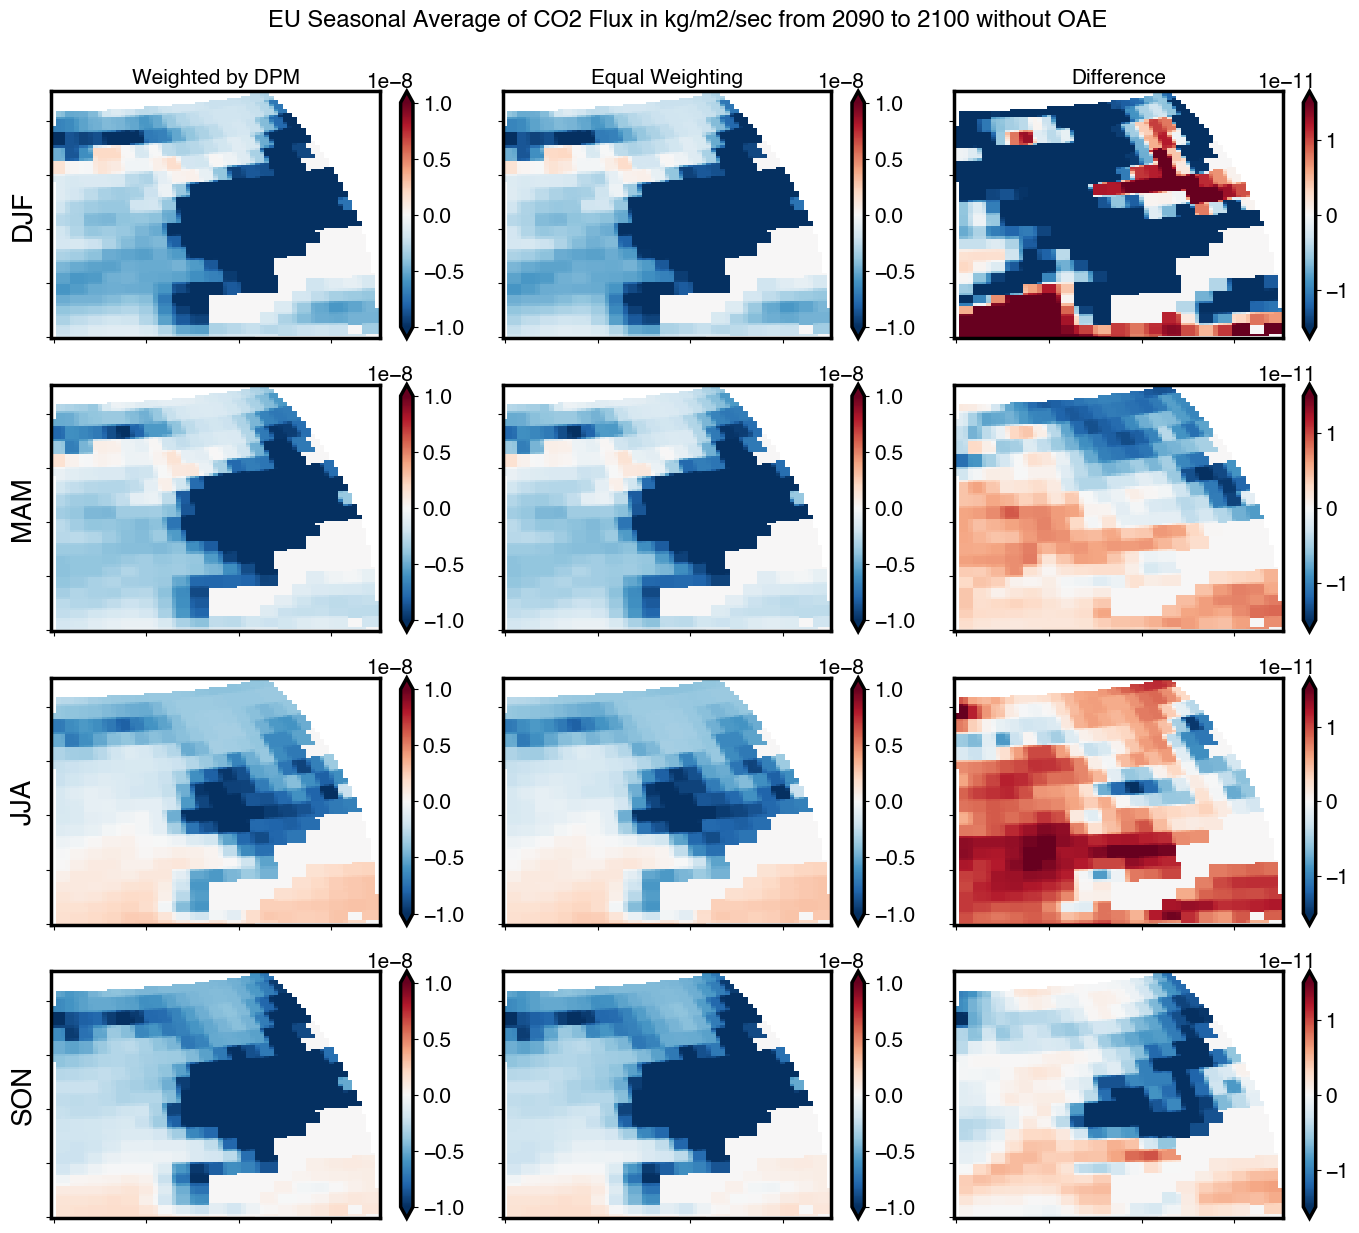

In [42]:
notnull = pd.notnull(ds_unweighted_baseline["co2flux_cpl"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.000000000015,
        vmax=0.000000000015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 without OAE", fontsize=17, y=1.03)

In [43]:
co2flux_weighted_baseline_describe = co2flux_weighted_baseline.describe()

In [44]:
co2flux_weighted_oae

,CO2_Flux,Month
time_counter,,
2089-12-01,-6.490389e-09,Winter
2090-03-01,-5.494221e-09,Spring
2090-06-01,-3.195791e-09,Summer
2090-09-01,-6.508115e-09,Fall
2090-12-01,-7.573399e-09,Winter
2091-03-01,-4.996022e-09,Spring
2091-06-01,-3.065250e-09,Summer
2091-09-01,-5.684482e-09,Fall
2091-12-01,-8.544571e-09,Winter


In [45]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

co2flux_baseline_month = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [46]:
co2flux_month_summary_baseline = co2flux_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_baseline = co2flux_baseline_month.resample(time_counter='M', keep_attrs=True).mean()
co2flux_monthly_mean_baseline = co2flux_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [47]:
co2flux_oae_month = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [48]:
co2flux_month_summary_oae = co2flux_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_oae = co2flux_oae_month.resample(time_counter='M', keep_attrs=True).mean()
co2flux_monthly_mean_oae = co2flux_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


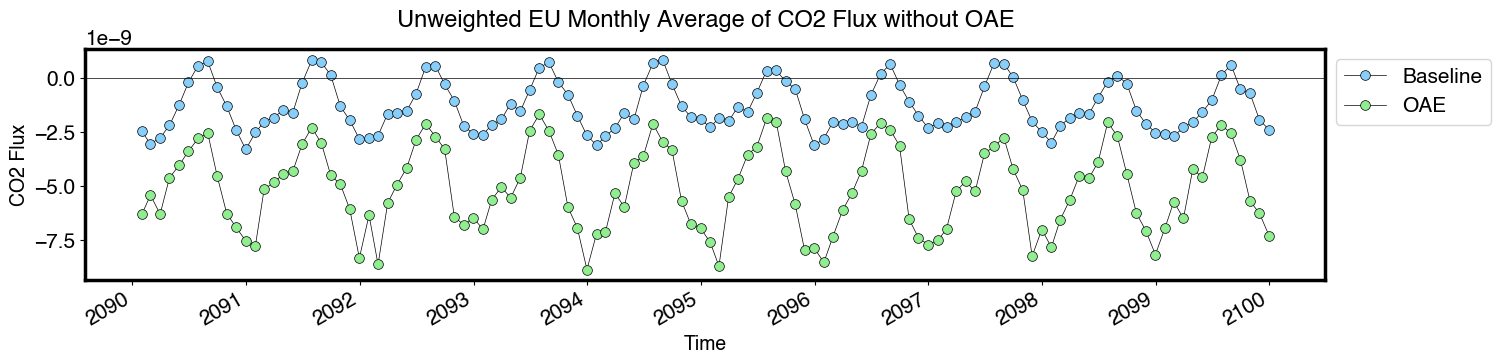

In [49]:
f, ax = plt.subplots(figsize=(16, 3))

co2flux_monthly_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_monthly_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of CO2 Flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [50]:
co2flux_baseline_monthly = co2flux_monthly_mean_baseline.to_dataframe('CO2_Flux')
co2flux_baseline_monthly['Month'] = pd.DatetimeIndex(co2flux_baseline_monthly.index).month

In [51]:
conditions = [
    (co2flux_baseline_monthly['Month'] == 1),
    (co2flux_baseline_monthly['Month'] == 2),
    (co2flux_baseline_monthly['Month'] == 3),
    (co2flux_baseline_monthly['Month'] == 4),
    (co2flux_baseline_monthly['Month'] == 5),
    (co2flux_baseline_monthly['Month'] == 6),
    (co2flux_baseline_monthly['Month'] == 7),
    (co2flux_baseline_monthly['Month'] == 8),
    (co2flux_baseline_monthly['Month'] == 9),
    (co2flux_baseline_monthly['Month'] == 10),
    (co2flux_baseline_monthly['Month'] == 11),
    (co2flux_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_baseline_monthly['Month'] = np.select(conditions, values)

In [52]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

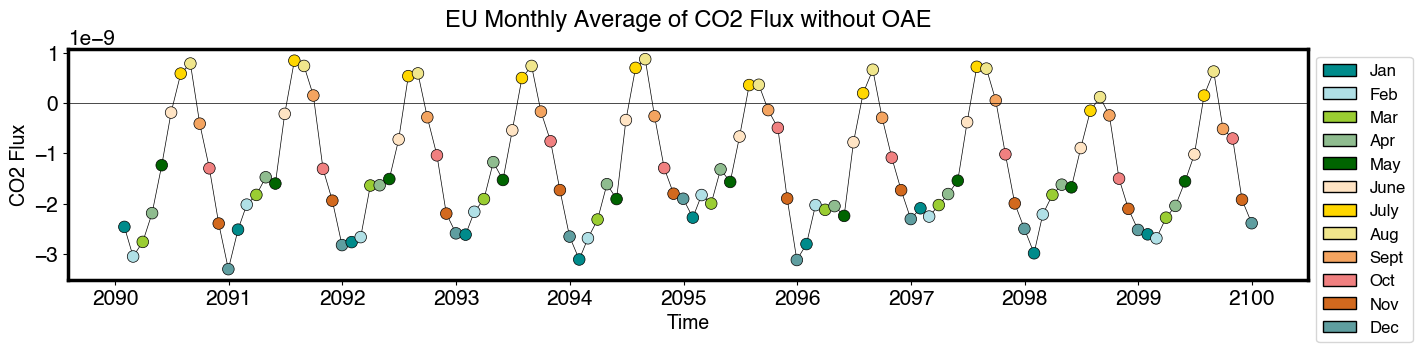

In [53]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

In [54]:
co2flux_oae_monthly = co2flux_monthly_mean_oae.to_dataframe('CO2_Flux')
co2flux_oae_monthly['Month'] = pd.DatetimeIndex(co2flux_oae_monthly.index).month

In [55]:
conditions = [
    (co2flux_oae_monthly['Month'] == 1),
    (co2flux_oae_monthly['Month'] == 2),
    (co2flux_oae_monthly['Month'] == 3),
    (co2flux_oae_monthly['Month'] == 4),
    (co2flux_oae_monthly['Month'] == 5),
    (co2flux_oae_monthly['Month'] == 6),
    (co2flux_oae_monthly['Month'] == 7),
    (co2flux_oae_monthly['Month'] == 8),
    (co2flux_oae_monthly['Month'] == 9),
    (co2flux_oae_monthly['Month'] == 10),
    (co2flux_oae_monthly['Month'] == 11),
    (co2flux_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_oae_monthly['Month'] = np.select(conditions, values)

In [56]:
colors = dict(zip(co2flux_oae_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

Text(0.5, 1.06, 'EU Monthly Average of CO2 Flux with OAE')

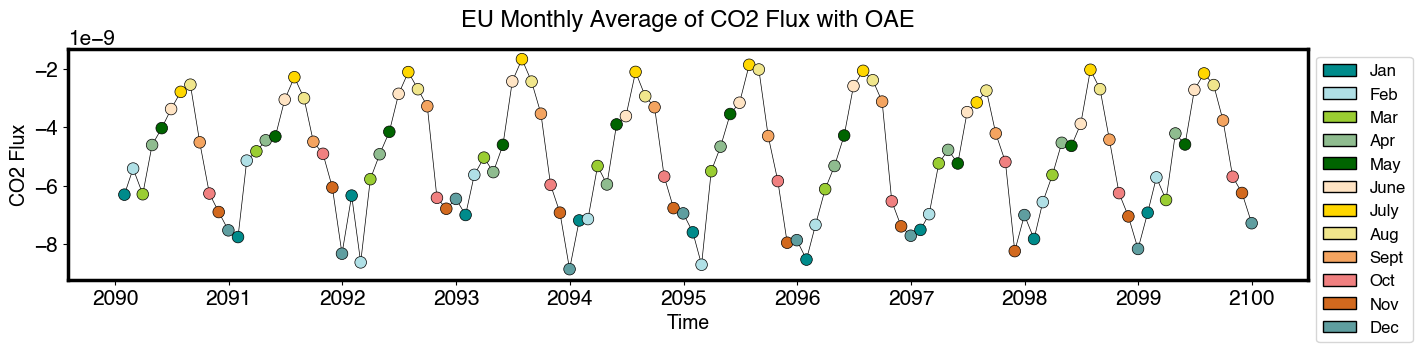

In [57]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux with OAE", fontname="Helvetica", fontsize=17, y=1.06)

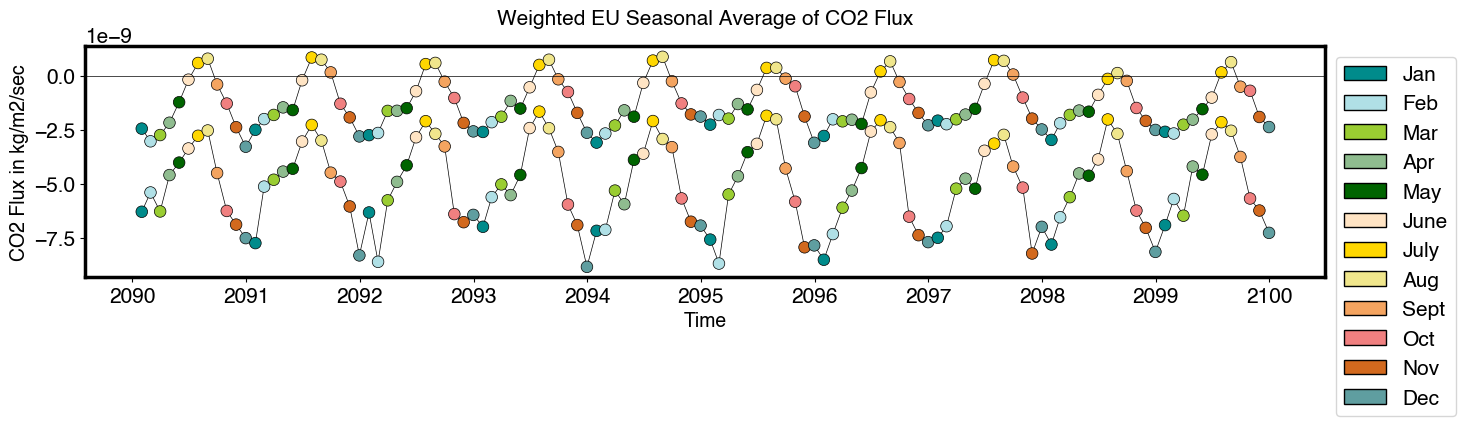

In [58]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

In [147]:
sliced_data_baseline_minmax = sliced_data_baseline.to_dataframe()
sliced_data_baseline_minmax = sliced_data_baseline_minmax.reset_index()

In [148]:
sliced_data_baseline_minmax = sliced_data_baseline_minmax.drop_duplicates('co2flux_cpl')

In [149]:
year_max_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmax().values]

In [150]:
year_min_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmin().values]

In [151]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [152]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [153]:
co2flux_amplitude_baseline = year_max_baseline['co2flux_cpl'] - year_min_baseline['co2flux_cpl']

In [154]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_xarray()

In [155]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_dataset()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


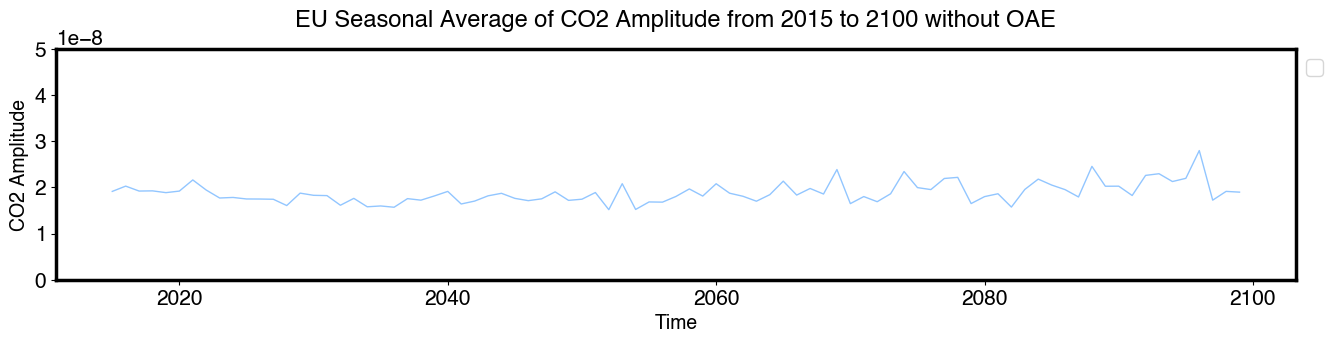

In [156]:
plt.figure(figsize=(16, 3))
plt.plot(co2flux_amplitude_baseline.year, co2flux_amplitude_baseline.co2flux_cpl, linewidth=1)
plt.ylim(0, 0.00000005)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Amplitude", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of CO2 Amplitude from 2015 to 2100 without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [157]:
sliced_data_oae_minmax = sliced_data_oae.to_dataframe()
sliced_data_oae_minmax = sliced_data_oae_minmax.reset_index()

In [158]:
sliced_data_oae_minmax = sliced_data_oae_minmax.drop_duplicates('co2flux_cpl')

In [159]:
year_max_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmax().values]

In [160]:
year_min_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmin().values]

In [161]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [162]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [163]:
co2flux_amplitude_oae = year_max_oae['co2flux_cpl'] - year_min_oae['co2flux_cpl']

In [164]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_xarray()

In [165]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataset()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


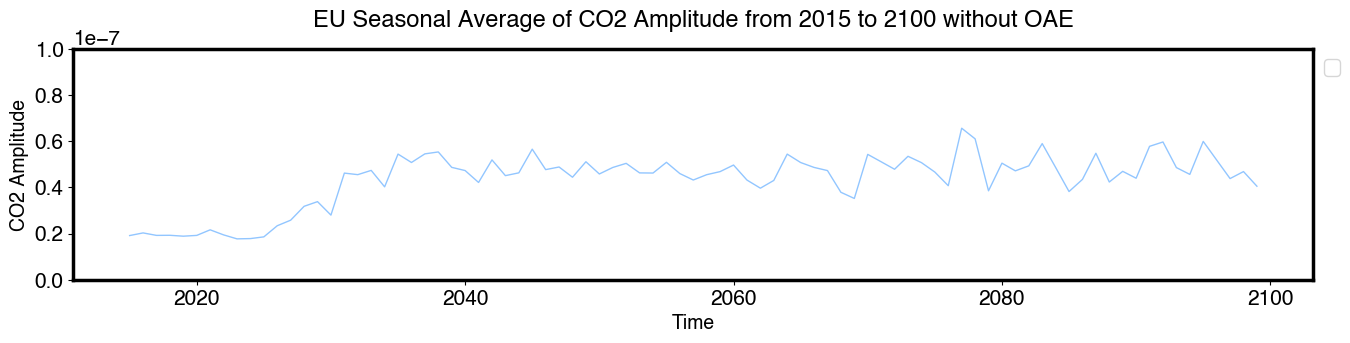

In [166]:
plt.figure(figsize=(16, 3))
plt.plot(co2flux_amplitude_oae.year, co2flux_amplitude_oae.co2flux_cpl, linewidth=1)
plt.ylim(0, 0.0000001)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Amplitude", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of CO2 Amplitude from 2015 to 2100 without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [169]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_dataframe()
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataframe()

In [172]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.pct_change()
co2flux_amplitude_oae = co2flux_amplitude_oae.pct_change()

In [176]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_xarray()
co2flux_amplitude_oae = co2flux_amplitude_oae.to_xarray()

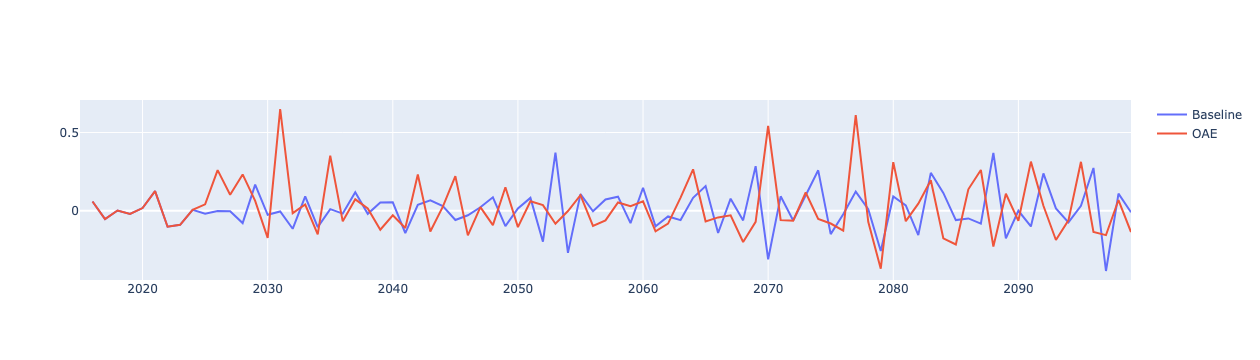

In [178]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=co2flux_amplitude_baseline.year, y=co2flux_amplitude_baseline['co2flux_cpl'],
                    mode='lines',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=co2flux_amplitude_oae.year, y=co2flux_amplitude_oae['co2flux_cpl'],
                    mode='lines',
                    name='OAE'))
fig.show()